In [70]:
import numpy as np
import time

In [71]:
#Setup an input matrix for testing
n = 10
A = np.random.randint(0,100,(n,n))

In [72]:
A

array([[88, 56, 40, 15, 54, 45, 28, 95, 17,  9],
       [ 0, 38, 57, 78, 64, 33, 76, 14, 12, 94],
       [85, 48, 54, 96, 98, 76, 72, 74,  2, 16],
       [27, 25, 32, 23, 43, 50, 21, 34, 88, 27],
       [86, 75, 31,  8, 11, 27, 91, 52, 57, 82],
       [ 3, 72, 80, 14, 89,  4, 71, 45, 72, 86],
       [24, 27, 53, 71, 80, 35, 27, 13, 70, 17],
       [35, 43, 83,  0, 76, 96, 36, 90, 30, 29],
       [17, 15, 58, 93, 73, 35, 51, 83, 60, 88],
       [74, 95, 92, 26, 20, 86, 33, 24, 67, 55]])

In [73]:
#1D peak finding
def binarypeak(a,n):
  if n == 1:
    return a[0]
  
  if n % 2 == 0:
    mid = int(n/2)
  else:
    mid = int((n+1)/2)
  
  #print('Arguments',mid,a[mid-2],a[mid-1],a[mid])
  if a[mid-1] < a[mid - 2]:
    #print('Passing to next level',a[:mid])
    return binarypeak(a[:mid],len(a[:mid]))
  elif a[mid-1] < a[mid]:
    #print('Passing to next level',a[mid:])
    return binarypeak(a[mid:],len(a[mid:]))
  else:
    return a[mid-1]

In [74]:
#Verify Function to use binary partions and find a peak
binarypeak(A[5,:],10)

89

In [75]:
size=1000
B = np.zeros((200,size))
#Plot performance of binary search
for i in range(size-1):
  count = 0
  for n in range(10,10000,50):
    A = np.random.randint(0,100,n)
    start = time.time()
    #print(A,n)
    binarypeak(A,n)
    end = time.time()
    B[count,0] = n
    B[count,i+1] = end-start
    count = count+1

In [76]:
B.shape

(200, 1000)

In [77]:
C = np.zeros((200,2))
C[:,0] = B[:,0]
C[:,1] = np.mean(B[:,1:size-1],axis=1)*1000

Text(0.5, 1.0, '1D Peak Finding: log worst case performance growth')

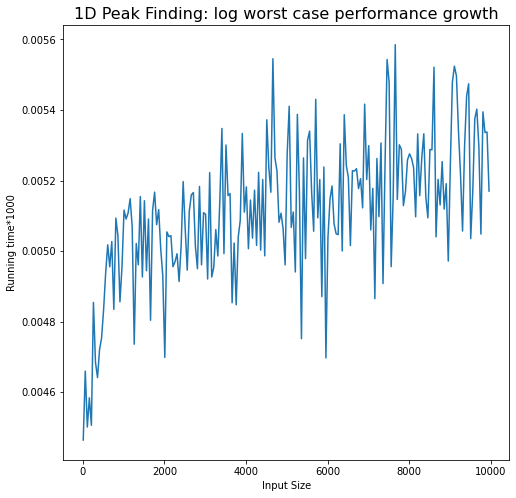

In [78]:
#Plot Performance vs Input Size
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(C[:,0],C[:,1])
plt.xlabel('Input Size')
plt.ylabel('Running time*1000')
plt.title('1D Peak Finding: log worst case performance growth',fontsize=16)

In [79]:
#Implement 2D peak finding
def peak2D(a,nrow,ncol):
  if ncol == 1:
    return np.max(a,axis=1)

  if ncol % 2 == 0:
    mid = int(ncol/2)
  else:
    mid = int((ncol+1)/2)
  
  r = 4
  c = mid-1
  print('arg1',ncol,c,a[:,c])
  rnew = np.argmax(a[:,c])
  print('arguments',r,c,rnew)
  print('arguments',a[rnew,c-1],a[rnew,c],a[rnew,c+1])
  if a[rnew,c] < a[rnew,c-1]:
    print('Passing to next level',a[:,:c+1])
    return peak2D(a[:,:c+1],a[:,:c+1].shape[0],a[:,:c+1].shape[1])
  elif a[rnew,c] < a[rnew,c+1]:
    print('Passing to next level',a[:,c+1:])
    return peak2D(a[:,c+1:],a[:c+1].shape[0],a[:,c+1:].shape[1])
  else:
    return a[rnew,c]

In [110]:
#Setup an input matrix for testing
n = 10
A = np.random.randint(0,100,(n,n))
A

array([[40, 26, 27, 29, 57, 28, 50,  6, 21, 71],
       [28, 98,  5, 89,  6, 39, 61, 48, 65, 38],
       [23, 26, 55,  6, 77, 90, 94,  6, 12, 91],
       [25, 79, 71, 84, 19, 51, 68, 42, 43, 61],
       [42, 16, 98, 53, 53, 13, 71, 77, 44, 74],
       [56, 90, 74, 20, 53, 33, 27, 53, 28, 70],
       [22,  6, 24, 97, 36, 57, 93, 58, 30, 95],
       [41, 95, 27, 65,  5, 90, 44, 23,  2, 92],
       [91, 46, 65, 78, 67, 64,  8, 71, 96, 44],
       [13, 69, 13, 54,  5, 19,  4, 46, 20, 68]])

In [112]:
#Find a 2D peak in the fastest manner
peak2D(A,10,10)

arg1 10 4 [57  6 77 19 53 53 36  5 67  5]
arguments 4 4 2
arguments 6 77 90
Passing to next level [[28 50  6 21 71]
 [39 61 48 65 38]
 [90 94  6 12 91]
 [51 68 42 43 61]
 [13 71 77 44 74]
 [33 27 53 28 70]
 [57 93 58 30 95]
 [90 44 23  2 92]
 [64  8 71 96 44]
 [19  4 46 20 68]]
arg1 5 2 [ 6 48  6 42 77 53 58 23 71 46]
arguments 4 2 4
arguments 71 77 44


77